#**Trabalho de casa 2** - SMT Solving
  
#### Número: **pg47483**
#### Nome: **Maria José Costa Ramos**
#### Curso:  **Mestrado em Engenharia Informática**
#### Disciplina: **Metodos Formais em Engenharia de Software**


## **Futoshiki Puzzle**

###**Problema**
Futoshiki é um puzzle lógico japonês jogado num tabuleiro N×N, onde são assinaladas restrições de desigualdade entre entre algumas posições contíguas do tabuleiro.  
O objetivo é colocar os números 1..N de forma a que cada número não apareça repetido em cada linha nem em cada coluna do tabuleiro, e que as relações de desigualdade assinaladas sejam respeitadas. Alguns números podem estar fixos no tabuleiro inicial.

In [ ]:
!pip install z3-solver

     |████████████████████████████████| 33.0 MB 18 kB/s 


In [ ]:
from z3 import *
import re

##Input 

Um exemplo de input para um puzzle como  
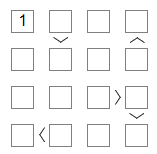  


é: 
<p> n=4 [1-_-_-_] [.->-.-<] [_-_-_-_] [_-_-_>_] [.-.-.->]  [_<_-_-_] </p> 


As regras são:

1.   Indicar o tamanho do puzzle através da expressão "**n=\<tamanho\>**" ou "**N=\<tamanho**\>"
2.   Indicar uma linha do puzzle entre parêntesis retos
3.   Separar as casinhas do puzzle com o carater "**-**", "**<**" ou "**>**". Os últimos dois símbolo só devem ser usados caso exista uma restrição de menor ou maior, respetivamente, entre casinhas na mesma linha. Usa-se "**-**"" quando não existe nenhuma restrição de desigualdade.
4.   Eventualmente, entre as linhas do puzzle, podem surgir desigualdades. Para declarar essas desigualdades abrir parêntesis retos e colocar um "**.**" caso não exista desigualdade entre a casinha da linha imediatamente acima e a da linha imediatamente abaixo. Colocar "**-**" para separar casinhas. Colocar "**>**" caso a casinha da linha acima seja maior que a casinha da linha abaixo e "**<**" caso a casinha da linha acima seja menor que a casinha da linha abaixo.



###Alguns puzzles já prontos para input

####Puzzle 1
<p> n=4 [_>_-_<_] [.->-.-.] [_-_-_-_] [.->-.-.] [_-_-_>_] [_-_-_-_] </p>

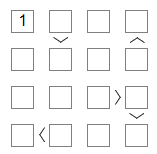



O código a seguir apresentado faz o *parsing* do input fornecido.  
É criado um dicionário ***puzzle*** que contém, para cada posição, um carater que corresponde a um número, caso o puzzle fornecido como input tenha já um valor para essa posição, ou '_', caso não tenha um valor definido.  
São criados dos arrays (***menor*** e ***maior***), que guardam as posições do puzzle entre as quais existe uma desigualdade. 

In [ ]:
puzzle = {}
menor = {}
maior = {}

puzzle_string = input("Introduza o seu puzzle: ")

m = re.match(r"[nN] *= *(\d)", puzzle_string) #Obtenção do tamanho do puzzle

if (m):
  N = int(m.group(1))

  m = re.findall(r"\[([^\]]*)\]", puzzle_string) #significado da re: qualquer caracter entre parêntesis retos exceto ']'
  
  correct = 1
  for line in m: #verifica se o input dentro dos parêntesis retos está correto. Não verifica se, caso exista um valor, ele está entre 1 e N e se o número de linhas do puzzle está correto. 
    if (re.match(r"([\d_][-<>]){" + str(N-1) + r"}[\d_]|([.<>]-){" + str(N-1) + r"}[.<>]", line) == None):
      correct=0
      break
  
  if(correct):

    l = 0
    for i in range(len(m)):
      counter = 0
      chr = 0
      for c in m[i]: #percorre todos os caracteres 
        if (c=='<'):
          if (re.match(r"[\d_]",m[i-1][chr])): #quando é '<' entre linhas
            menor[str(l-1)+str(counter)] = str(l)+str(counter)
            counter+=1

          else: #quando é '<' entre elems na mesma linha
            menor[str(l)+str(counter-1)] = str(l)+str(counter)

        elif (c=='>'):
            if (re.match(r"[\d_]",m[i-1][chr])): #quando é '>' entre linhas
              maior[str(l-1)+str(counter)] = str(l)+str(counter)
              counter+=1

            else: #quando é '>' entre elems na mesma linha
              maior[str(l)+str(counter-1)] = str(l)+str(counter)

        elif (re.match(r"[\d_]",c)): #se for um número ou o caracter '_'
          if (counter==0):
            puzzle[l] = {}

          puzzle[l][counter] = c
          counter+=1


          if (counter==N):
            l+=1
          
        elif (re.match(r"\.",c)): #se for um '.'
          counter+=1
          
        chr+=1 #conta os chars 
      
    print(puzzle)
    print(menor)
    print(maior)

  else:
    print("Tente novamente, input incorreto.")
else: 
  print("Tente novamente, input incorreto.")

Introduza o seu puzzle: n=6 [_-_-_-_-_-_] [>-.-.-<-.-.] [_-_-_-_-_-_] [_-_>5-_-_-_] [<-.-.-<-.-.] [_<_-_-2-_-_] [.-.-<-.-.-.] [_-_-2-_-_-_] [.-.-.->-<-.] [2-_-_>_>_<_]
{0: {0: '_', 1: '_', 2: '_', 3: '_', 4: '_', 5: '_'}, 1: {0: '_', 1: '_', 2: '_', 3: '_', 4: '_', 5: '_'}, 2: {0: '_', 1: '_', 2: '5', 3: '_', 4: '_', 5: '_'}, 3: {0: '_', 1: '_', 2: '_', 3: '2', 4: '_', 5: '_'}, 4: {0: '_', 1: '_', 2: '2', 3: '_', 4: '_', 5: '_'}, 5: {0: '2', 1: '_', 2: '_', 3: '_', 4: '_', 5: '_'}}
{'03': '13', '20': '30', '23': '33', '30': '31', '32': '42', '44': '54', '54': '55'}
{'00': '10', '21': '22', '43': '53', '52': '53', '53': '54'}


Na porção de código a seguir, para além da declaração das variáveis, estão as restrições relativas a:

* Elementos da mesma linha devem ser diferentes
* Elementos da mesma coluna devem ser diferentes
* Cada casa deve conter um número entre 1 e N
* Valores já presentes no puzzle inicial fornecido devem ser impostos às respetivas variáveis


In [ ]:
s = Solver()
puzzle_lines={}
puzzle_columns={}

for i in range(N):
  puzzle_columns[i] = {}
  puzzle_lines[i] = {}

for i in range(N):
  for j in range(N):
    puzzle_lines[i][j] = Int('x'+str(i)+str(j))       # declaração de variáveis

    if (puzzle[i][j] != '_'):
      s.add(puzzle_lines[i][j] == int(puzzle[i][j]))   #se o puzzle fornecido no input tem um valor para essa variável, é-lhe atribuído
    else:
     s.add(And(1<= puzzle_lines[i][j], puzzle_lines[i][j]<=N))  #se a variável não tem valor dado pelo puzzle inicial, então acrescentar restrições de valor 
  
  s.add(Distinct (*puzzle_lines[i].values()))  #elementos da mesma linha devem ser diferentes


for i in range(N):
   for j in range(N):
     puzzle_columns[j][i] = puzzle_lines[i][j]

for i in range(N):
  s.add(Distinct (*puzzle_columns[i].values()))  #elementos da mesma coluna devem ser diferentes




A porção de código a seguir diz respeito às restrições de menor e maior entre elementos do puzzle.

In [ ]:
menor_list = list(menor.items())
maior_list = list(maior.items())

for restriction in menor_list:
  i1 = int(restriction[0][0])
  j1 = int(restriction[0][1])
  i2 = int(restriction[1][0])
  j2 = int(restriction[1][1])
  s.add(puzzle_lines[i1][j1] < puzzle_lines[i2][j2])

for restriction in maior_list:
  i1 = int(restriction[0][0])
  j1 = int(restriction[0][1])
  i2 = int(restriction[1][0])
  j2 = int(restriction[1][1])
  s.add(puzzle_lines[i1][j1] > puzzle_lines[i2][j2])



Código correspondente à impressão da solução do puzzle no ecrã.

In [ ]:
print(s.check())
if (s.check()==sat):

  simb_entre_linhas = {}

  m = s.model()
  m_sorted = sorted([(x,m[x]) for x in m], key=lambda l:str(l[0])) #ordenação da solução com base nas posições do puzzle
  
  i=0  #conta os elementos já percorridos numa linha
  line = 0   #conta as linhas já percorridas

  for elem in m_sorted:
    print(" " + str(elem[1]) + " " ,end="") 
    pos=""
    y = re.match(r"x(\d\d)",str(elem[0])) #obtém posição do elemento
    if (y):
      pos = y.group(1)

    if pos in menor:  #verifica se o elemento aparece no dicionário 'menor'
      if (pos[0] == menor[pos][0]): #se o elemento  menor na mesma linha
        print("<",end="")
      else: 
        print(" ",end="")
        if line in simb_entre_linhas:
         simb_entre_linhas[line].append(("<",pos[1]))
        else:
           simb_entre_linhas[line] = [("<",pos[1])]

    elif pos in maior: #verifica se o elemento aparece no dicionário 'maior'
      if (pos[0] == maior[pos][0]):
        print(">",end="")
      else:
        print(" ",end="")
        if line in simb_entre_linhas:
         simb_entre_linhas[line].append((">",pos[1]))
        else:
           simb_entre_linhas[line] = [(">",pos[1])]

    else:
      print(" ",end="")

    i+=1
    if (i == N): #se chegamos ao fim da linha
      print("")
      str_line=""

      if line in simb_entre_linhas:
        j=0
      
        for elem in simb_entre_linhas[line]:

          while (j!=int(elem[1])):
            str_line+="    "
            j+=1

          j+=1
          str_line+= " " + elem[0] + "  "       
        
      print(str_line)
      line+=1
      i=0



sat
 6   2   4   3   5   1  
 >           <  
 1   4   3   5   2   6  

 3   6 > 5   1   4   2  
 <           <  
 4 < 5   1   2   6   3  
         <  
 5   3   2   6   1   4  
             >   <  
 2   1   6 > 4 > 3 < 5  

